# Inspecting, Cleaning, EDA

In [473]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


## Inspection

In [474]:
# Reading in the training data. Storing the dataset as 
ames_training = pd.read_csv('./datasets/train.csv')
ames_test = pd.read_csv('./datasets/test.csv')

In [475]:
# Checking the shape of the data frame. 2051 rows and 81 columns
ames_training.shape

(2051, 81)

In [476]:
# Inspecting the first few rows of the data.
ames_training.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [477]:
# Inspecting the data frame's columns and data types
ames_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

## Cleaning

In [478]:
# Re-assigning column names
clean_columns = [column.replace(' ', '_').lower() for column in list(ames_training.columns)]
ames_training.columns = clean_columns
ames_test.columns = clean_columns[:-1]
ames_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               878 non-null    int64  
 1   pid              878 non-null    int64  
 2   ms_subclass      878 non-null    int64  
 3   ms_zoning        878 non-null    object 
 4   lot_frontage     718 non-null    float64
 5   lot_area         878 non-null    int64  
 6   street           878 non-null    object 
 7   alley            58 non-null     object 
 8   lot_shape        878 non-null    object 
 9   land_contour     878 non-null    object 
 10  utilities        878 non-null    object 
 11  lot_config       878 non-null    object 
 12  land_slope       878 non-null    object 
 13  neighborhood     878 non-null    object 
 14  condition_1      878 non-null    object 
 15  condition_2      878 non-null    object 
 16  bldg_type        878 non-null    object 
 17  house_style     

In [479]:
nominal_features = ['ms_subclass', 
                    'ms_zoning', 
                    'street', 
                    'alley', 
                    'land_contour', 
                    'lot_config',
                    'neighborhood',
                    'condition_1',
                    'condition_2',
                    'bldg_type',
                    'house_style',
                    'roof_style',
                    'roof_matl',
                    'exterior_1st',
                    'exterior_2nd',
                    'mas_vnr_type',
                    'foundation',
                    'heating',
                    'simp_heating'
                    'central_air',
                    'garage_type',
                    'misc_feature',
                    'simp_misc_feature'
                    'mo_sold',
                    'sale_type',
                    'simp_sale_type',
                    ]
continuous_features = ['lot_frontage', 
                       'lot_area',
                       'year_built',
                       'year_remod/add',
                       'mas_vnr_area',
                       'bsmtfin_sf_1',
                       'bsmtfin_sf_2',
                       'bsmt_unf_sf',
                       'total_bsmt_sf',
                       '1st_flr_sf',
                       '2nd_flr_sf',
                       'low_qual_fin_sf',
                       'fireplaces',
                       'gr_liv_area',
                       'garage_yr_blt',
                       'garage_area',
                       'wood_deck_sf',
                       'open_porch_sf',
                       'enclosed_porch',
                       '3ssn_porch',
                       'pool_area',
                       'misc_val',
                       'yr_sold',
                       'bsmt_full_bath',
                       'bsmt_half_bath',
                       'full_bath',
                       'half_bath',
                       'bedroom_abvgr',
                       'kitchen_abvgr',
                       'totrmsabvgrd',
                       'garage_cars'
                       ]
oridinal_features = ['lot_shape', 
                     'utilities', 
                     'land_slope',
                     'overall_qual',
                     'overall_cond',
                     'exter_qual',
                     'exter_cond',
                     'bsmt_qual',
                     'bsmt_cond',
                     'bsmt_exposure',
                     'bsmtfin_type_1',
                     'bsmtfintype_2',
                     'heatingqc',
                     'electrical',
                     'kitchenqual'
                     'functional',
                     'fireplacequ',
                     'garage_finish',
                     'garage_qual',
                     'garage_cond',
                     'paved_drive',
                     'pool_qc',
                     'fence'
                     ]

In [480]:
ames_training['ms_subclass'].value_counts()
ames_training['ms_subclass'] = \
        ames_training['ms_subclass'].apply(
            lambda x: str(x))
ames_test['ms_subclass'] = \
        ames_test['ms_subclass'].apply(
            lambda x: str(x))


In [481]:
ames_training['alley'].fillna('no_alley', inplace=True)
ames_test['alley'].fillna('no_alley', inplace=True)

In [482]:
ames_training['alley'].value_counts()

no_alley    1911
Grvl          85
Pave          55
Name: alley, dtype: int64

In [483]:
ames_training['land_contour'].value_counts()
ames_training['land_contour'] = \
        ames_training['land_contour'].apply(
            lambda x: 'not_level' if x != 'Lvl' else x)
ames_test['land_contour'] = \
        ames_test['land_contour'].apply(
            lambda x: 'not_level' if x != 'Lvl' else x)


In [484]:
ames_training['mas_vnr_type'].isna().sum()
ames_training['mas_vnr_type'].fillna('None', inplace=True)
ames_test['mas_vnr_type'].fillna('None', inplace=True)

In [485]:
ames_training['heating'].value_counts()
ames_training['simp_heating'] = \
            ames_training['heating'].apply(
                lambda x: 'other' if x != 'GasA' else x)
ames_test['simp_heating'] = \
            ames_test['heating'].apply(
                lambda x: 'other' if x != 'GasA' else x)

In [486]:
ames_training['bsmt_full_bath'].value_counts()
ames_training['bsmt_full_bath'].fillna(0.0)
ames_test['bsmt_full_bath'].fillna(0.0)

0      0
1      0
2      1
3      0
4      1
      ..
873    1
874    0
875    0
876    0
877    1
Name: bsmt_full_bath, Length: 878, dtype: int64

<AxesSubplot:xlabel='neighborhood', ylabel='saleprice'>

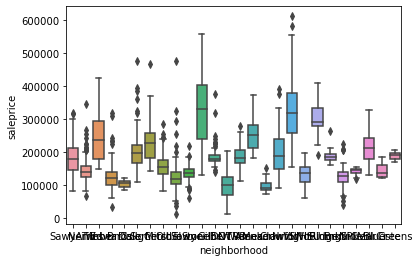

In [569]:
sns.boxplot(data=ames_training, x='neighborhood', y='saleprice')

In [487]:
ames_training['bsmt_half_bath'].fillna(0.0)
ames_test['bsmt_half_bath'].fillna(0.0)

0      0
1      0
2      0
3      0
4      0
      ..
873    0
874    0
875    0
876    0
877    0
Name: bsmt_half_bath, Length: 878, dtype: int64

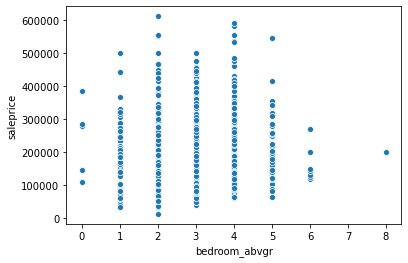

In [488]:
sns.scatterplot(data=ames_training, x='bedroom_abvgr', y='saleprice' )
ames_training = ames_training[ames_training['bedroom_abvgr']<7]

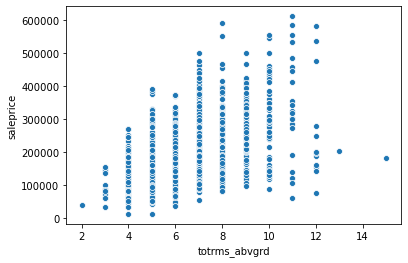

In [489]:
sns.scatterplot(data=ames_training, x='totrms_abvgrd', y='saleprice')
ames_training = ames_training[ames_training['totrms_abvgrd']<13]



In [490]:
ames_training['garage_type'].fillna('None')
ames_test['garage_type'].fillna('None')

0      Detchd
1      Attchd
2      Attchd
3      Detchd
4      Attchd
        ...  
873    Attchd
874    Attchd
875    Attchd
876    Detchd
877    Attchd
Name: garage_type, Length: 878, dtype: object

In [491]:
ames_training['garage_cars'].fillna(0.0, inplace=True)
ames_test['garage_cars'].fillna(0.0, inplace=True)

In [492]:
ames_training['misc_feature'].fillna('None')
ames_test['misc_feature'].fillna('None')
ames_training['simp_misc_feature'] = \
            ames_training['misc_feature'].apply(
                lambda x: 0 if x == 'None' else 1)
ames_test['simp_misc_feature'] = \
            ames_test['misc_feature'].apply(
                lambda x: 0 if x == 'None' else 1)

In [493]:
ames_training['mo_sold'] = \
            ames_training['mo_sold'].replace({
    1: 'Jan', 
    2: 'Feb', 
    3: 'Mar', 
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
})

ames_test['mo_sold'] = \
            ames_test['mo_sold'].replace({
    1: 'Jan', 
    2: 'Feb', 
    3: 'Mar', 
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
})

In [494]:
ames_training['sale_type'].value_counts()

WD       1779
New       159
COD        63
ConLD      17
CWD        10
ConLI       7
ConLw       5
Con         4
Oth         4
Name: sale_type, dtype: int64

In [495]:
ames_training['simp_sale_type'] = \
            ames_training['sale_type'].apply(
                lambda x: 'other' if x != 'WD' else x)
ames_test['simp_sale_type'] = \
            ames_test['sale_type'].apply(
                lambda x: 'other' if x != 'WD' else x)

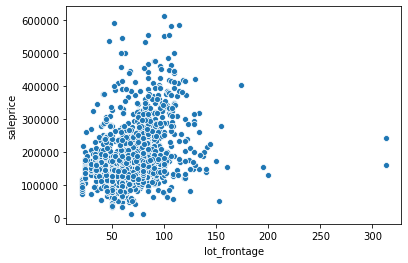

In [496]:
sns.scatterplot(data=ames_training, x='lot_frontage', y='saleprice')
ames_training = ames_training[ames_training['lot_frontage']<170]

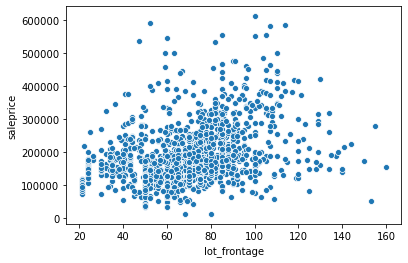

In [497]:
sns.scatterplot(data=ames_training, x='lot_frontage', y='saleprice')
ames_test['lot_frontage'].fillna(ames_training['lot_frontage'].mean(), inplace=True)

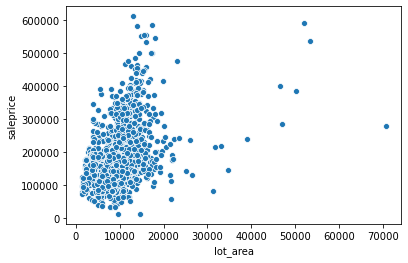

In [498]:
sns.scatterplot(data=ames_training, x='lot_area', y='saleprice')
ames_training = ames_training[ames_training['lot_area']<45000]

In [499]:
ames_training['lot_area'].isna().sum()

0

<AxesSubplot:xlabel='year_built', ylabel='saleprice'>

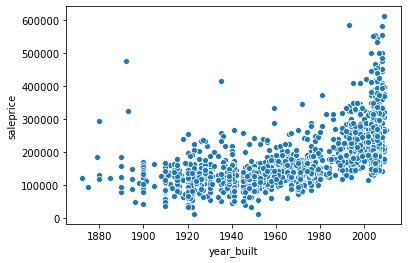

In [500]:
sns.scatterplot(data=ames_training, x='year_built', y='saleprice')


In [501]:
ames_training['year_built'].isna().sum()

0

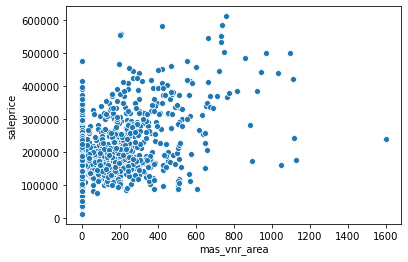

In [502]:
sns.scatterplot(data=ames_training, x='mas_vnr_area', y='saleprice')
ames_training['mas_vnr_area'].isna().sum()
ames_training['mas_vnr_area'].fillna(0.0)
ames_test['mas_vnr_area'].fillna(0.0)
ames_training = ames_training[ames_training['mas_vnr_area']< 1400]

0        0
1        0
2      554
3        0
4      609
      ... 
873    931
874    575
875    250
876    616
877    793
Name: bsmtfin_sf_1, Length: 878, dtype: int64

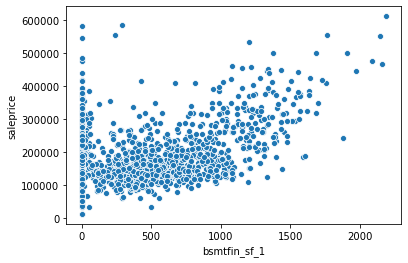

In [503]:
sns.scatterplot(data=ames_training, x='bsmtfin_sf_1', y='saleprice')
ames_training['bsmtfin_sf_1'].isna().sum()
ames_training['bsmtfin_sf_1'].fillna(0.0)
ames_test['bsmtfin_sf_1'].fillna(0.0)

0        0
1        0
2        0
3        0
4        0
      ... 
873    153
874      0
875    492
876      0
877      0
Name: bsmtfin_sf_2, Length: 878, dtype: int64

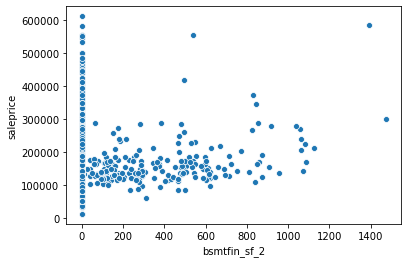

In [504]:
sns.scatterplot(data=ames_training, x='bsmtfin_sf_2', y='saleprice')
ames_training['bsmtfin_sf_2'].isna().sum()
ames_training['bsmtfin_sf_2'].fillna(0.0)
ames_test['bsmtfin_sf_2'].fillna(0.0)

0      1020
1      1967
2       100
3       968
4       785
       ... 
873       0
874     529
875     210
876     248
877     130
Name: bsmt_unf_sf, Length: 878, dtype: int64

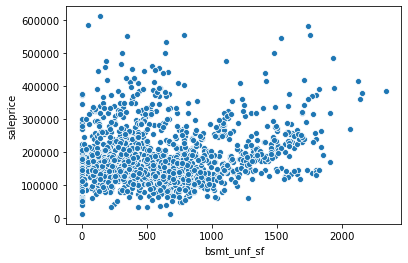

In [505]:
sns.scatterplot(data=ames_training, x='bsmt_unf_sf', y='saleprice')
ames_training['bsmt_unf_sf'].isna().sum()
ames_training['bsmt_unf_sf'].fillna(0.0)
ames_test['bsmt_unf_sf'].fillna(0.0)

0      1020
1      1967
2       654
3       968
4      1394
       ... 
873    1084
874    1104
875     952
876     864
877     923
Name: total_bsmt_sf, Length: 878, dtype: int64

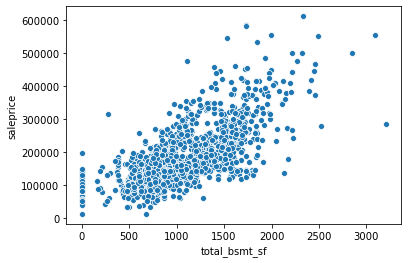

In [506]:
sns.scatterplot(data=ames_training, x='total_bsmt_sf', y='saleprice')
ames_training['total_bsmt_sf'].isna().sum()
ames_training['total_bsmt_sf'].fillna(0.0)
ames_test['total_bsmt_sf'].fillna(0.0)

0

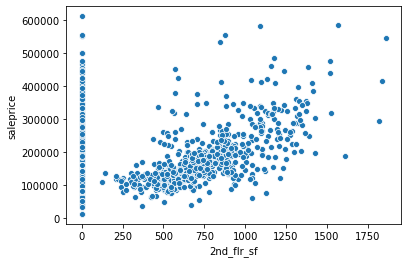

In [507]:
sns.scatterplot(data=ames_training, x='2nd_flr_sf', y='saleprice')
ames_training['2nd_flr_sf'].isna().sum()

In [508]:
ames_training['2nd_flr_sf'] = \
            ames_training['2nd_flr_sf'].apply(
                lambda x: ames_training['2nd_flr_sf'].mean() if x == 0 else x)
ames_test['2nd_flr_sf'] = \
            ames_test['2nd_flr_sf'].apply(
                lambda x: ames_training['2nd_flr_sf'].mean() if x == 0 else x)

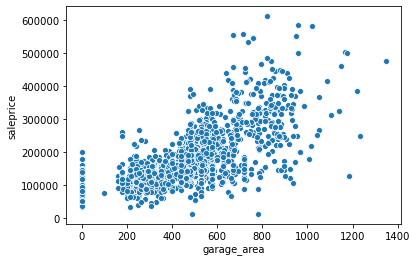

In [509]:
sns.scatterplot(data=ames_training, x='garage_area', y='saleprice')
ames_training['garage_area'].isna().sum()
ames_training['garage_area'].fillna(0.0)
ames_test['garage_area'].fillna(0.0)

ames_training['garage_area'] = \
            ames_training['garage_area'].apply(
                lambda x: ames_training['garage_area'].mean() if x == 0 else x)
ames_test['garage_area'] = \
            ames_test['garage_area'].apply(
                lambda x: ames_training['garage_area'].mean() if x == 0 else x)

0

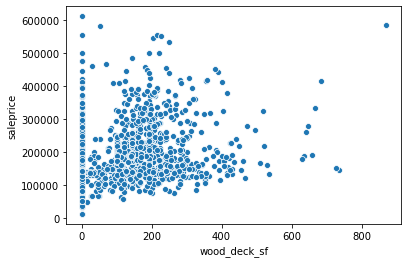

In [510]:
sns.scatterplot(data=ames_training, x='wood_deck_sf', y='saleprice')
ames_training['wood_deck_sf'].isna().sum()

In [511]:
ames_training['wood_deck_sf'] = \
            ames_training['wood_deck_sf'].apply(
                lambda x: ames_training['wood_deck_sf'].mean() if x == 0 else x)
ames_test['wood_deck_sf'] = \
            ames_test['wood_deck_sf'].apply(
                lambda x: ames_training['wood_deck_sf'].mean() if x == 0 else x)

0

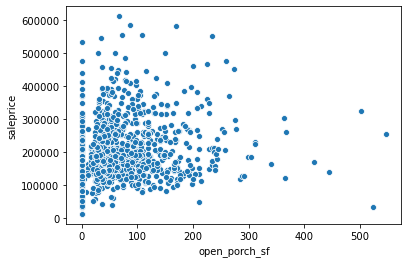

In [512]:
sns.scatterplot(data=ames_training, x='open_porch_sf', y='saleprice')
ames_training['open_porch_sf'].isna().sum()

In [513]:
ames_training['open_porch_sf'] = \
            ames_training['open_porch_sf'].apply(
                lambda x: ames_training['open_porch_sf'].mean() if x == 0 else x)
ames_test['open_porch_sf'] = \
            ames_test['open_porch_sf'].apply(
                lambda x: ames_training['open_porch_sf'].mean() if x == 0 else x)

0

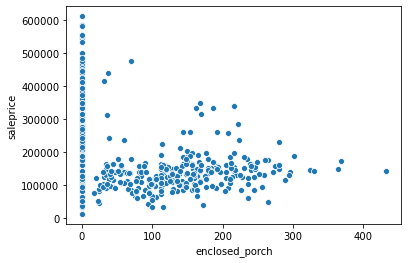

In [514]:
sns.scatterplot(data=ames_training, x='enclosed_porch', y='saleprice')
ames_training['enclosed_porch'].isna().sum()

In [515]:
ames_training['enclosed_porch'] = \
            ames_training['enclosed_porch'].apply(
                lambda x: ames_training['enclosed_porch'].mean() if x == 0 else x)
ames_test['enclosed_porch'] = \
            ames_test['enclosed_porch'].apply(
                lambda x: ames_training['enclosed_porch'].mean() if x == 0 else x)

0

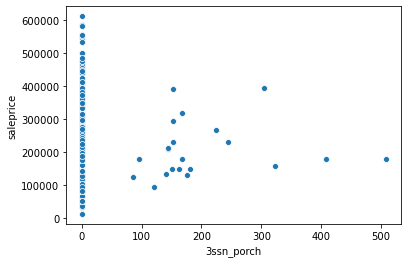

In [516]:
sns.scatterplot(data=ames_training, x='3ssn_porch', y='saleprice')
ames_training['3ssn_porch'].isna().sum()

In [517]:
ames_training['3ssn_porch'] = \
            ames_training['3ssn_porch'].apply(
                lambda x: ames_training['3ssn_porch'].mean() if x == 0 else x)
ames_test['3ssn_porch'] = \
            ames_test['3ssn_porch'].apply(
                lambda x: ames_training['3ssn_porch'].mean() if x == 0 else x)

0

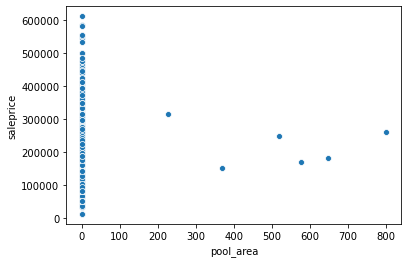

In [518]:
sns.scatterplot(data=ames_training, x='pool_area', y='saleprice')
ames_training['pool_area'].isna().sum()

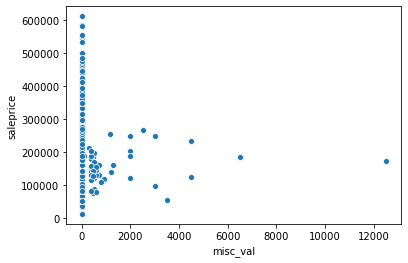

In [519]:
sns.scatterplot(data=ames_training, x='misc_val', y='saleprice')
ames_training['misc_val'].isna().sum()
ames_training = ames_training[ames_training['misc_val']<8000]

0

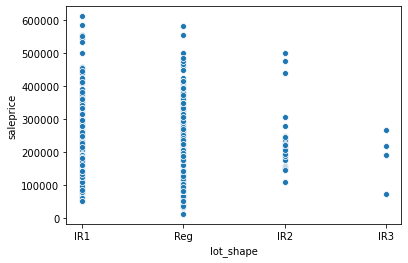

In [520]:
sns.scatterplot(data=ames_training, x='lot_shape', y='saleprice')
ames_training['lot_shape'].isna().sum()

In [521]:
ames_training['lot_shape'].value_counts()

Reg    1200
IR1     453
IR2      32
IR3       5
Name: lot_shape, dtype: int64

In [522]:
ames_training['lot_shape'] = \
            ames_training['lot_shape'].replace({
                'IR3': 0.0,
                'IR2': 1.0,
                'IR1': 2.0,
                'Reg': 3.0
})

In [563]:
nominal_features = ['ms_subclass', 
                    'ms_zoning', 
                    'street', 
                    'alley', 
                    'land_contour', 
                    'lot_config',
                    'neighborhood',
                    'condition_1',
                    'condition_2',
                    'bldg_type',
                    'house_style',
                    'roof_style',
                    'roof_matl',
                    'exterior_1st',
                    'exterior_2nd',
                    'mas_vnr_type',
                    'foundation',
                    'heating',
                    'simp_heating',
                    'central_air',
                    'garage_type',
                    'misc_feature',
                    'simp_misc_feature',
                    'mo_sold',
                    'sale_type',
                    'simp_sale_type',
                    'utilities', 
                    'land_slope',
                    'bsmtfin_type_1',
                    'bsmtfintype_2',
                    'electrical',
                    'paved_drive',
                    'fence',
                    ]
continuous_features = ['lot_frontage', 
                       'lot_area',
                       'year_built',
                       'year_remod/add',
                       'mas_vnr_area',
                       'bsmtfin_sf_1',
                       'bsmtfin_sf_2',
                       'bsmt_unf_sf',
                       'total_bsmt_sf',
                       '1st_flr_sf',
                       '2nd_flr_sf',
                       'low_qual_fin_sf',
                       'fireplaces',
                       'gr_liv_area',
                       'garage_yr_blt',
                       'garage_area',
                       'wood_deck_sf',
                       'open_porch_sf',
                       'enclosed_porch',
                       '3ssn_porch',
                       'pool_area',
                       'misc_val',
                       'yr_sold',
                       'bsmt_full_bath',
                       'bsmt_half_bath',
                       'full_bath',
                       'half_bath',
                       'bedroom_abvgr',
                       'kitchen_abvgr',
                       'totrmsabvgrd',
                       'garage_cars',
                       'functional'
                       ]
oridinal_features = ['lot_shape', 
                     'overall_qual',
                     'overall_cond',
                     'exter_qual',
                     'exter_cond',
                     'bsmt_qual',
                     'bsmt_cond',
                     'bsmt_exposure',
                     'heating_qc',
                     'kitchen_qual'
                     'fireplace_qual',
                     'garage_finish',
                     'garage_qual',
                     'garage_cond',
                     'pool_qc'
                     ]

In [524]:
ames_training['utilities'].value_counts()

AllPub    1689
NoSewr       1
Name: utilities, dtype: int64

0

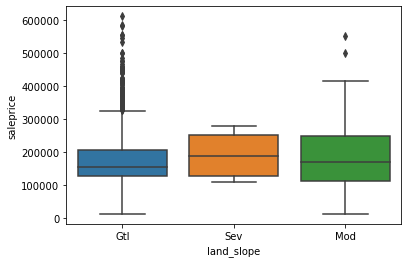

In [525]:
sns.boxplot(data=ames_training, x='land_slope', y='saleprice')
ames_training['land_slope'].isna().sum()

0

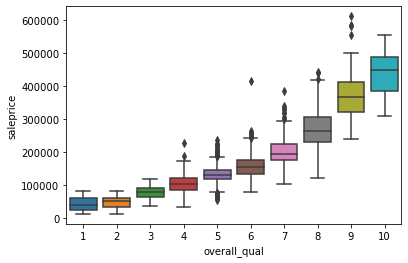

In [526]:
sns.boxplot(data=ames_training, x='overall_qual', y='saleprice')
ames_training['overall_qual'].isna().sum()

In [527]:
ames_training[(ames_training['overall_qual'] == 6) & (ames_training['saleprice']> 300000)]
ames_training.drop(1897, inplace=True)

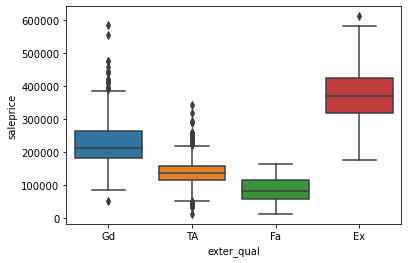

In [528]:
sns.boxplot(data=ames_training, x='exter_qual', y='saleprice')
ames_training['exter_qual'].isna().sum()
ames_training['exter_qual'] = \
            ames_training['exter_qual'].replace({
                'Po': 0,
                'Fa': 1,
                'TA': 2,
                'Gd': 3, 
                'Ex': 4
})

In [529]:
ames_test['exter_qual'] = \
            ames_test['exter_qual'].replace({
                'Po': 0,
                'Fa': 1,
                'TA': 2,
                'Gd': 3, 
                'Ex': 4
})

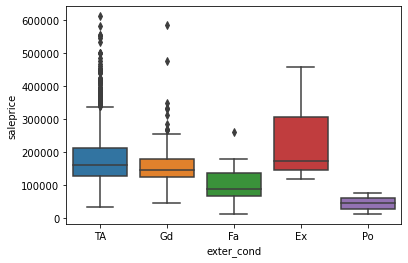

In [530]:
sns.boxplot(data=ames_training, x='exter_cond', y='saleprice')
ames_training['exter_cond'].isna().sum()
ames_training['exter_cond'] = \
            ames_training['exter_cond'].replace({
                'Po': 0,
                'Fa': 1,
                'TA': 2,
                'Gd': 3, 
                'Ex': 4
})
ames_test['exter_cond'] = \
            ames_test['exter_cond'].replace({
                'Po': 0,
                'Fa': 1,
                'TA': 2,
                'Gd': 3, 
                'Ex': 4
})

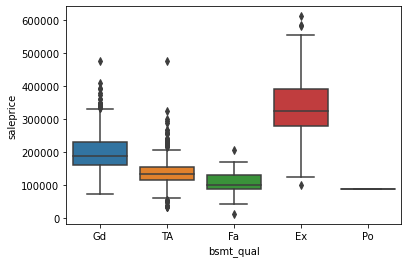

In [531]:
sns.boxplot(data=ames_training, x='bsmt_qual', y='saleprice')
ames_training['bsmt_qual'].isna().sum()
ames_training['bsmt_qual'].fillna(0, inplace=True)
ames_test['bsmt_qual'].fillna(0, inplace=True)


In [532]:
ames_training['bsmt_qual'] = \
            ames_training['bsmt_qual'].replace({
                'Po': 0,
                'Fa': 1,
                'TA': 2,
                'Gd': 3, 
                'Ex': 4,
                'None': 0
})
ames_test['bsmt_qual'] = \
            ames_test['bsmt_qual'].replace({
                'Po': 0,
                'Fa': 1,
                'TA': 2,
                'Gd': 3, 
                'Ex': 4,
                'None': 0
})

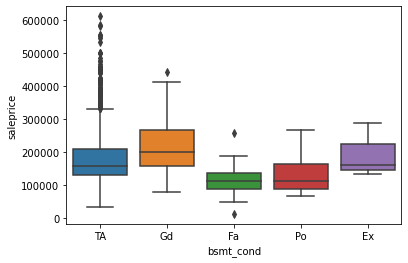

In [533]:
sns.boxplot(data=ames_training, x='bsmt_cond', y='saleprice')
ames_training['bsmt_cond'].isna().sum()
ames_training['bsmt_cond'].fillna('None', inplace=True)
ames_test['bsmt_cond'].fillna('None', inplace=True)

In [534]:
ames_training['bsmt_cond'] = \
            ames_training['bsmt_cond'].replace({
                'Po': 0,
                'Fa': 1,
                'TA': 2,
                'Gd': 3, 
                'Ex': 4,
                'None': 0
})
ames_test['bsmt_cond'] = \
            ames_test['bsmt_cond'].replace({
                'Po': 0,
                'Fa': 1,
                'TA': 2,
                'Gd': 3, 
                'Ex': 4,
                'None': 0
})

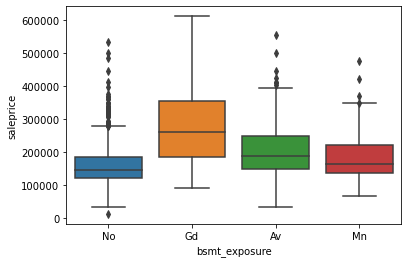

In [535]:
sns.boxplot(data=ames_training, x='bsmt_exposure', y='saleprice')
ames_training['bsmt_exposure'].isna().sum()
ames_training['bsmt_exposure'].fillna('None', inplace=True)
ames_test['bsmt_exposure'].fillna('None', inplace=True)

In [536]:
ames_training['bsmt_exposure'] = \
            ames_training['bsmt_exposure'].replace({
                'No': 1,
                'Mn': 2,
                'Av': 3, 
                'Gd': 4,
                'None': 0
})
ames_test['bsmt_exposure'] = \
            ames_test['bsmt_exposure'].replace({
                'No': 1,
                'Mn': 2,
                'Av': 3, 
                'Gd': 4,
                'None': 0
})

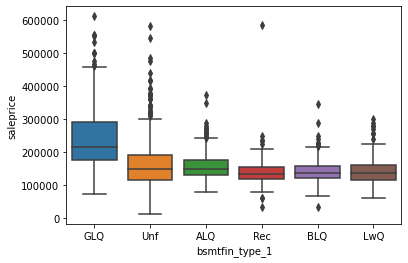

In [537]:
sns.boxplot(data=ames_training, x='bsmtfin_type_1', y='saleprice')
ames_training['bsmtfin_type_1'].isna().sum()
ames_training['bsmtfin_type_1'].fillna('None', inplace=True)
ames_test['bsmtfin_type_1'].fillna('None', inplace=True)

In [538]:
ames_training[(ames_training['bsmtfin_type_1']=='Rec') & (ames_training['saleprice']>400000)]
ames_training.drop(1692, inplace=True)

0

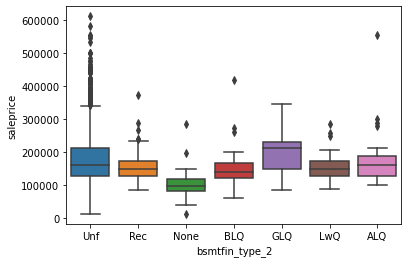

In [539]:
ames_training['bsmtfin_type_2'].fillna('None', inplace=True)
ames_test['bsmtfin_type_2'].fillna('None', inplace=True)
sns.boxplot(data=ames_training, x='bsmtfin_type_2', y='saleprice')
ames_training['bsmtfin_type_2'].isna().sum()


0

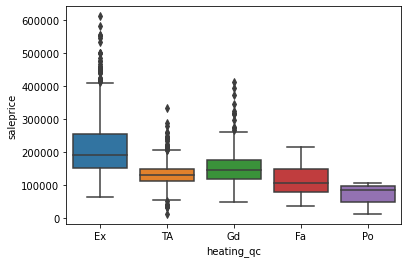

In [540]:
sns.boxplot(data=ames_training, x='heating_qc', y='saleprice')
ames_training['heating_qc'].isna().sum()

In [541]:
ames_training['heating_qc'] = \
            ames_training['heating_qc'].replace({
                'Po': 0,
                'Fa': 1,
                'TA': 2,
                'Gd': 3, 
                'Ex': 4
})
ames_test['heating_qc'] = \
            ames_test['heating_qc'].replace({
                'Po': 0,
                'Fa': 1,
                'TA': 2,
                'Gd': 3, 
                'Ex': 4
})

0

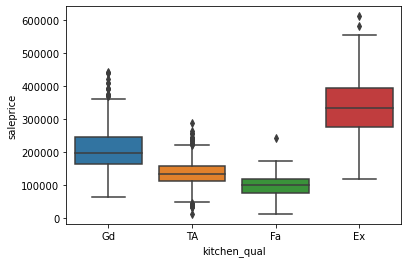

In [542]:
sns.boxplot(data=ames_training, x='kitchen_qual', y='saleprice')
ames_training['kitchen_qual'].isna().sum()

In [543]:
ames_training['kitchen_qual'] = \
            ames_training['kitchen_qual'].replace({
                'Po': 0,
                'Fa': 1,
                'TA': 2,
                'Gd': 3, 
                'Ex': 4
})
ames_test['kitchen_qual'] = \
            ames_test['kitchen_qual'].replace({
                'Po': 0,
                'Fa': 1,
                'TA': 2,
                'Gd': 3, 
                'Ex': 4
})

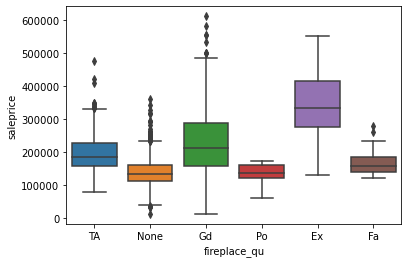

In [544]:
ames_training['fireplace_qu'].fillna('None', inplace=True)
sns.boxplot(data=ames_training, x='fireplace_qu', y='saleprice')
ames_training['fireplace_qu'].isna().sum()
ames_test['fireplace_qu'].fillna('None', inplace=True)

In [545]:
ames_training['fireplace_qu'] = \
            ames_training['fireplace_qu'].replace({
                'Po': 0,
                'Fa': 1,
                'TA': 2,
                'Gd': 3, 
                'Ex': 4,
                'None': 0
})
ames_test['fireplace_qu'] = \
            ames_test['fireplace_qu'].replace({
                'Po': 0,
                'Fa': 1,
                'TA': 2,
                'Gd': 3, 
                'Ex': 4,
                'None': 0
})

0

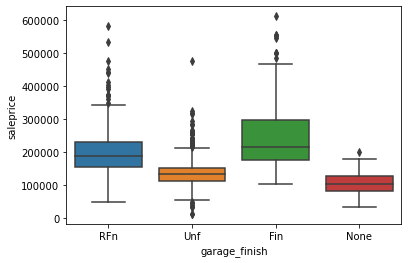

In [546]:
ames_training['garage_finish'].fillna('None', inplace=True)
ames_test['garage_finish'].fillna('None', inplace=True)
sns.boxplot(data=ames_training, x='garage_finish', y='saleprice')
ames_training['garage_finish'].isna().sum()

In [547]:
ames_training['garage_finish'] = \
            ames_training['garage_finish'].replace({
                'Unf': 1,
                'RFn': 2,
                'Fin': 3, 
                'None': 0
})
ames_test['garage_finish'] = \
            ames_test['garage_finish'].replace({
                'Unf': 1,
                'RFn': 2,
                'Fin': 3, 
                'None': 0
})

0

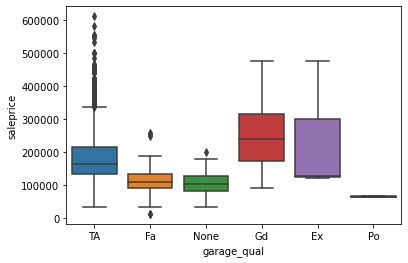

In [548]:
ames_training['garage_qual'].fillna('None', inplace=True)
ames_test['garage_qual'].fillna('None', inplace=True)
sns.boxplot(data=ames_training, x='garage_qual', y='saleprice')
ames_training['garage_qual'].isna().sum()

In [549]:
ames_training['garage_qual'] = \
            ames_training['garage_qual'].replace({
                'Po': 0,
                'Fa': 1,
                'TA': 2,
                'Gd': 3, 
                'Ex': 4,
                'None': 0
})
ames_test['garage_qual'] = \
            ames_test['garage_qual'].replace({
                'Po': 0,
                'Fa': 1,
                'TA': 2,
                'Gd': 3, 
                'Ex': 4,
                'None': 0
})

0

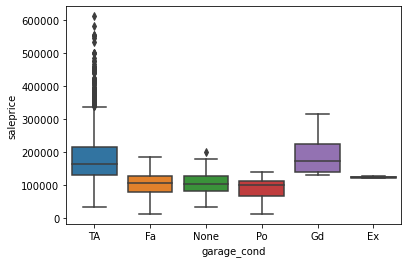

In [550]:
ames_training['garage_cond'].fillna('None', inplace=True)
ames_test['garage_cond'].fillna('None', inplace=True)
sns.boxplot(data=ames_training, x='garage_cond', y='saleprice')
ames_training['garage_cond'].isna().sum()

In [551]:
ames_training['garage_cond'] = \
            ames_training['garage_cond'].replace({
                'Po': 0,
                'Fa': 1,
                'TA': 2,
                'Gd': 3, 
                'Ex': 4,
                'None': .5
})
ames_test['garage_cond'] = \
            ames_test['garage_cond'].replace({
                'Po': 0,
                'Fa': 1,
                'TA': 2,
                'Gd': 3, 
                'Ex': 4,
                'None': .5
})

0

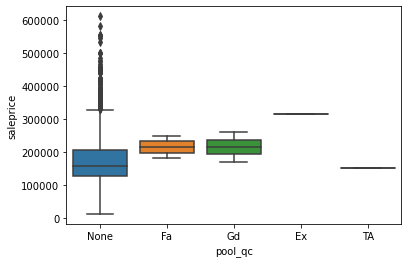

In [552]:
ames_training['pool_qc'].fillna('None', inplace=True)
ames_test['pool_qc'].fillna('None', inplace=True)

sns.boxplot(data=ames_training, x='pool_qc', y='saleprice')
ames_training['pool_qc'].isna().sum()

0

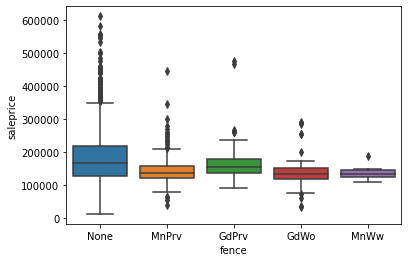

In [553]:
ames_training['fence'].fillna('None', inplace=True)
ames_test['fence'].fillna('None', inplace=True)


sns.boxplot(data=ames_training, x='fence', y='saleprice')
ames_training['fence'].isna().sum()

In [554]:
ames_training['misc_feature'].fillna('None', inplace=True)
ames_test['misc_feature'].fillna('None', inplace=True)

<AxesSubplot:xlabel='garage_type', ylabel='saleprice'>

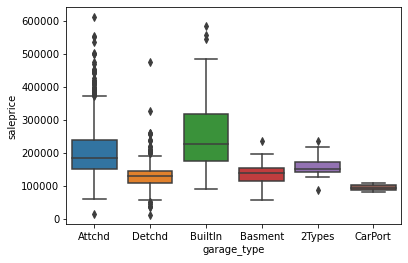

In [555]:
ames_training['garage_type'].isna().sum()
sns.boxplot(data=ames_training, x='garage_type', y='saleprice')

<AxesSubplot:xlabel='garage_yr_blt', ylabel='saleprice'>

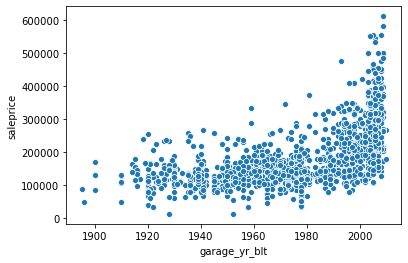

In [556]:
ames_training['garage_yr_blt'].fillna(ames_training['garage_yr_blt'].mean(), inplace=True)
ames_test['garage_yr_blt'].fillna(ames_training['garage_yr_blt'].mean(), inplace=True)
sns.scatterplot(data=ames_training, x='garage_yr_blt', y='saleprice')

In [557]:
ames_training['garage_type'].value_counts()

Attchd     970
Detchd     480
BuiltIn     95
Basment     17
2Types      13
CarPort      8
Name: garage_type, dtype: int64

In [558]:
ames_training['garage_type'].fillna('None', inplace=True)
ames_test['garage_type'].fillna('None', inplace=True)

In [559]:
ames_test['fireplace_qu'].fillna('None')

0      0
1      0
2      3
3      0
4      3
      ..
873    2
874    3
875    2
876    0
877    2
Name: fireplace_qu, Length: 878, dtype: int64

In [561]:
(list(ames_training.isnull().sum()), ames_training.columns)

([0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
        'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
        'lot_config', 'land_slope', 'neighborhood', 'condition_1',
        'condition_2', 'bldg_type', 'house_style', 'overall_qual',
        'overall_cond', 'year_built', 'year_remod/add', 'roof_style',
        'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
        'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
        'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
        '

In [562]:
ames_training.dropna(inplace=True)
ames_test.dropna(inplace=True)

In [564]:
ames_training.shape

(1686, 84)

In [565]:
ames_test.shape

(876, 83)

In [568]:
ames_training.to_csv('./datasets/training_experimental.csv')
ames_test.to_csv('./datasets/test_experimental.csv')

In [137]:
# Separating categorical features from data and replacing NaN's with 'none'
categorical_ames_training = ames_training.select_dtypes(include = 'object')
categorical_ames_training = categorical_ames_training.replace(np.nan, 'none')

In [138]:
# Separating numerical features from data and replacing NaN's with 'none'
numerical_ames_training = ames_training.select_dtypes(include = ['int', 'float'])
numerical_ames_training = numerical_ames_training.replace(np.nan, 0)

In [139]:
clean_ames_training = pd.concat([categorical_ames_training, numerical_ames_training], axis=1)

In [140]:
clean_ames_training.shape

(2051, 81)

In [141]:
clean_training_ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ms_zoning        2051 non-null   object 
 1   street           2051 non-null   object 
 2   alley            2051 non-null   object 
 3   lot_shape        2051 non-null   object 
 4   land_contour     2051 non-null   object 
 5   utilities        2051 non-null   object 
 6   lot_config       2051 non-null   object 
 7   land_slope       2051 non-null   object 
 8   neighborhood     2051 non-null   object 
 9   condition_1      2051 non-null   object 
 10  condition_2      2051 non-null   object 
 11  bldg_type        2051 non-null   object 
 12  house_style      2051 non-null   object 
 13  roof_style       2051 non-null   object 
 14  roof_matl        2051 non-null   object 
 15  exterior_1st     2051 non-null   object 
 16  exterior_2nd     2051 non-null   object 
 17  mas_vnr_type  

## Test Set Cleaning

In [142]:
numeric_ames_test = ames_test.select_dtypes(exclude='object')

In [143]:
numeric_ames_test = numeric_ames_test.replace(np.nan, 0)

In [144]:
categorical_ames_test = ames_test.select_dtypes(include='object')

In [145]:
categorical_ames_test = categorical_ames_test.replace(np.nan, 'none')

In [146]:
clean_ames_test = pd.concat([categorical_ames_test, numeric_ames_test], axis=1)

In [147]:
(clean_ames_test.shape, clean_ames_training.shape)

((878, 80), (2051, 81))

## EDA

<AxesSubplot:>

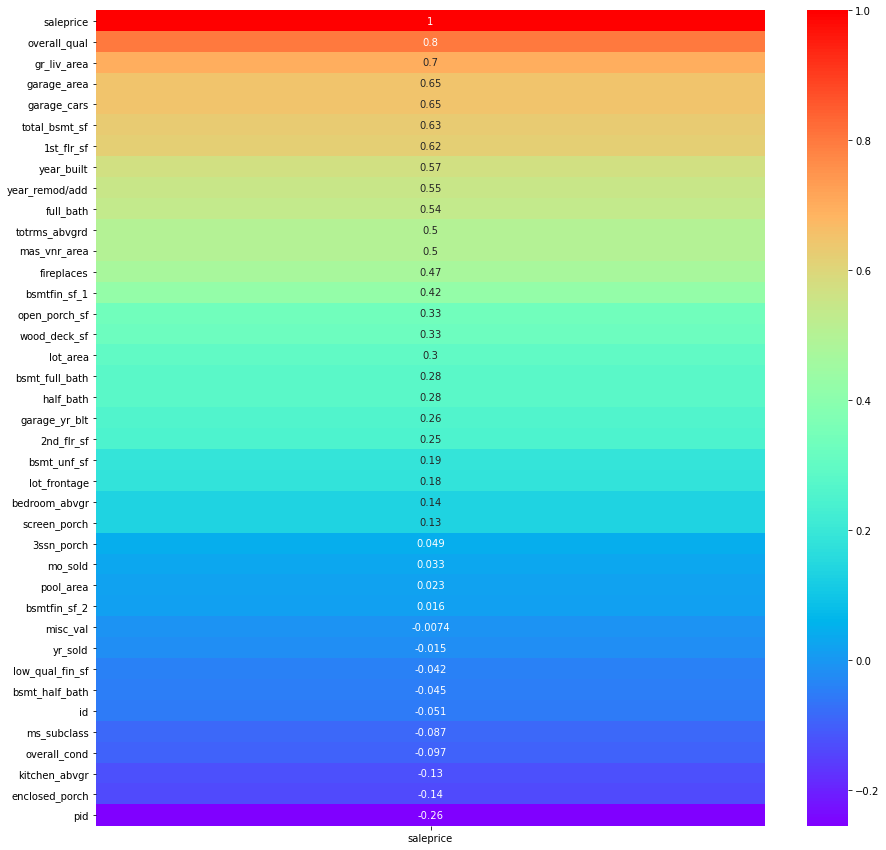

In [148]:
# Checking correlations between numeric features and saleprice. 
plt.figure(figsize=(15, 15))
sns.heatmap(clean_ames_training.corr()[['saleprice']].sort_values(by='saleprice', ascending=False), annot=True, cmap='rainbow')

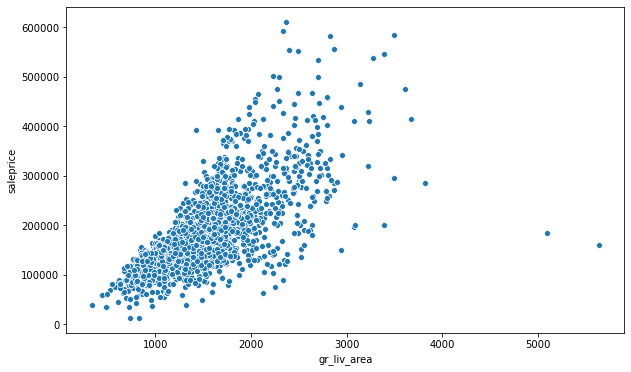

In [149]:
# Detecting outliers. Looks like we've got a couple. 
plt.figure(figsize=(10, 6))
sns.scatterplot(data=clean_ames_training, x='gr_liv_area', y='saleprice');
clean_ames_training = clean_ames_training[clean_ames_training['gr_liv_area']<4000]

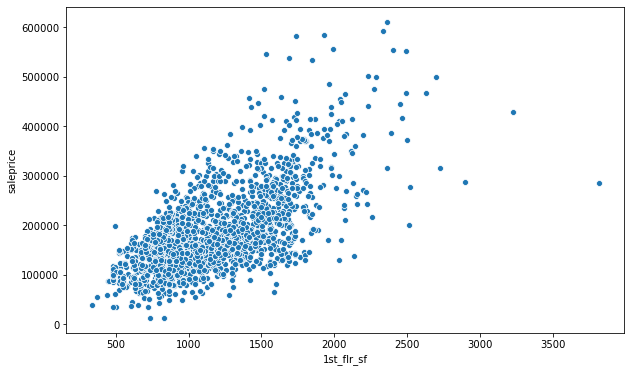

In [150]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=clean_ames_training, x='1st_flr_sf', y='saleprice');
clean_ames_training = clean_ames_training[clean_ames_training['1st_flr_sf']<2800]

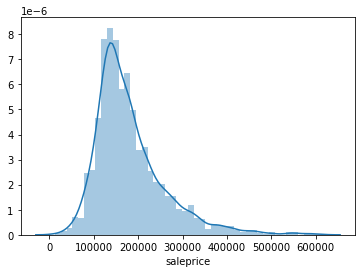

In [152]:
# Checking some distributions
sns.distplot(clean_ames_training['saleprice']);

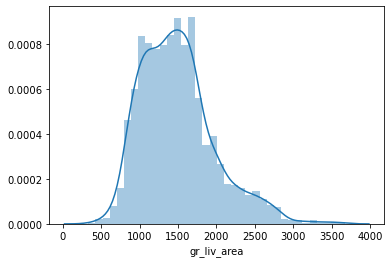

In [153]:
sns.distplot(clean_ames_training['gr_liv_area']);

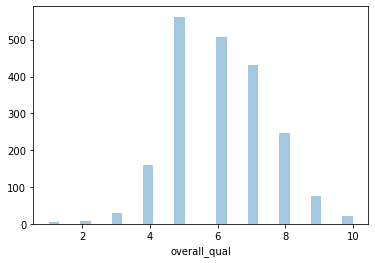

In [154]:
sns.distplot(clean_ames_training['overall_qual'], kde=False, );

All of these histograms look roughly normally distributed.

In [155]:
# Saving my clean CSVs
clean_training_ames.to_csv('./datasets/clean_training_ames.csv')
clean_ames_test.to_csv('./datasets/clean_test_ames.csv')